In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS PROJECT/Project_08_FraudAnalysis/fraudTest.csv')

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df1 = df.drop(['Unnamed: 0','cc_num','zip'],axis = 'columns')

In [ ]:
df1 = df1.select_dtypes(include=np.number)

In [ ]:
df1

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2.86,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,29.84,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,41.28,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,60.05,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,3.19,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...
555714,43.77,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0
555715,111.84,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0
555716,86.88,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0
555717,7.99,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0


In [ ]:
df2 = df1[df1.is_fraud == 0]

In [ ]:
df2.shape

(553574, 8)

In [ ]:
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/DS PROJECT/Project_08_FraudAnalysis/notfraud.csv')

In [ ]:
df3 = df1[df1.is_fraud == 1]

In [ ]:
df3.shape

(2145, 8)

In [ ]:
df3.to_csv('/content/drive/MyDrive/Colab Notebooks/DS PROJECT/Project_08_FraudAnalysis/fraud.csv')

In [ ]:
df.is_fraud.value_counts()

,count
is_fraud,
0,553574
1,2145


<Axes: xlabel='is_fraud'>

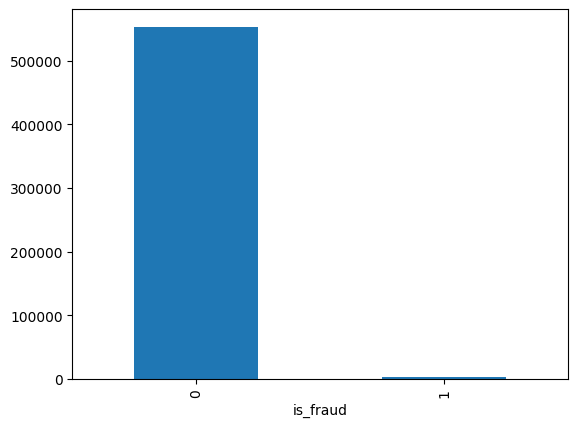

In [ ]:
df['is_fraud'].value_counts().plot(kind='bar')

In [ ]:
df.category.value_counts()

,count
category,
gas_transport,56370
grocery_pos,52553
home,52345
shopping_pos,49791
kids_pets,48692
shopping_net,41779
entertainment,40104
personal_care,39327
food_dining,39268


In [ ]:
x = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

In [ ]:
x.shape

(555719, 7)

In [ ]:
y.shape

(555719,)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state=99)

In [ ]:
print(x_train.shape,"|",x_test.shape,"|",y_train.shape,"|",y_test.shape)

(444575, 7) | (111144, 7) | (444575,) | (111144,)


In [ ]:
x_train

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
359295,7.69,29.0393,-95.4401,28739,1383864716,28.449870,-95.475967
121250,70.21,42.1767,-79.9416,2518,1375479546,42.922062,-80.859133
227618,2.65,33.9778,-86.5598,3996,1378847346,34.835025,-86.844513
57145,90.59,43.6498,-116.4306,84106,1373534322,44.367199,-116.744814
331240,60.98,41.8948,-73.9767,2471,1382778791,41.474578,-74.719892
...,...,...,...,...,...,...,...
228247,185.80,34.3795,-118.5230,34882,1378879408,34.227392,-118.692206
349252,9.14,48.4786,-122.3345,14871,1383433643,49.226670,-121.904611
239305,1.76,40.0246,-79.6955,2303,1379252156,39.335894,-80.575624
177337,113.91,40.7491,-95.0380,7297,1377206138,41.347034,-94.120786


In [ ]:
x_test

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
233441,21.35,41.5500,-87.4569,23727,1379089123,42.441991,-88.151005
70121,45.89,40.0369,-75.0664,1526206,1373851445,40.803627,-75.490221
30904,201.26,31.4841,-97.9903,258,1372685121,31.938631,-98.561410
439803,4.75,41.0646,-87.5917,2135,1386351894,41.579220,-88.088446
319260,59.97,40.0897,-74.9781,1526206,1382282454,40.925207,-74.365975
...,...,...,...,...,...,...,...
446694,56.30,44.2529,-85.0170,1126,1386446346,43.504632,-85.296981
321551,9.00,39.3199,-106.6596,61,1382371464,38.709565,-107.208015
522367,29.27,30.4590,-90.9027,71335,1387893439,29.821488,-90.059625
377995,50.42,39.1657,-84.2330,31394,1384553867,38.847018,-84.684375


In [ ]:
std = StandardScaler()
x_train_scaled = std.fit_transform(x_train)
x_test_scaled = std.fit_transform(x_test)

In [ ]:
x_train_scaled

array([[-0.38204008, -1.87956079, -0.38061413, ...,  0.61364651,
        -1.98244819, -0.38291785],
       [ 0.00379749,  0.71801873,  0.7500962 , ..., -0.99897624,
         0.85952264,  0.68259623],
       [-0.41314407, -0.90310072,  0.26725805, ..., -0.35128622,
        -0.72856597,  0.24628378],
       ...,
       [-0.41863664,  0.29249687,  0.7680507 , ..., -0.2734338 ,
         0.15529036,  0.703263  ],
       [ 0.27348882,  0.43574792, -0.35127847, ..., -0.66692077,
         0.55022716, -0.28413008],
       [ 0.08834603, -1.11075049, -0.51257714, ...,  1.4752029 ,
        -1.23271395, -0.51379933]])

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
x_train_scaled,y_train = smote.fit_resample(x_train_scaled,y_train)

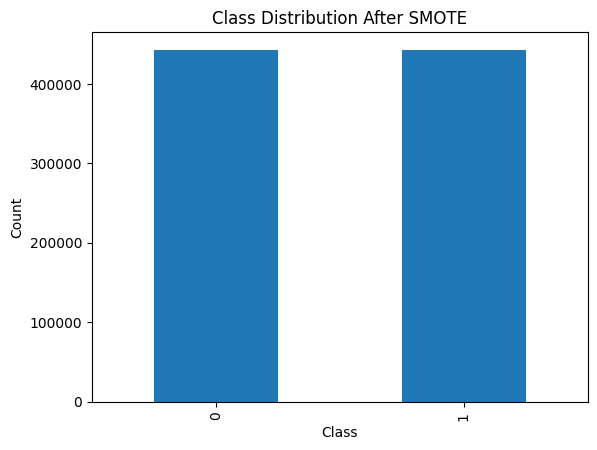

In [ ]:
pd.Series(y_train).value_counts().plot(kind='bar')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
models = {
  'LogisticRegression': LogisticRegression(max_iter = 100),
  'RandomForest':RandomForestClassifier(n_estimators= 50)
}

In [ ]:
result = {}
best_model,best_auc = None,0
for mp,m in models.items():
  m.fit(x_train_scaled,y_train)
  y_pred = m.predict(x_test_scaled)
  auc_score = roc_auc_score(y_test,m.predict_proba(x_test_scaled)[:,1])
  result[mp] = (accuracy_score(y_test,y_pred),auc_score)
  print(result)

  if auc_score > best_auc:
    best_model,best_auc = m,auc_score


{'LogisticRegression': (0.936775714388541, np.float64(0.8394013502076608))}
{'LogisticRegression': (0.936775714388541, np.float64(0.8394013502076608)), 'RandomForest': (0.9929550852947527, np.float64(0.9158781534826862))}


In [ ]:
best_auc

np.float64(0.9158781534826862)

In [ ]:
best_model

RandomForestClassifier(n_estimators=50)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
ann = Sequential([
        Dense(16, activation='relu', input_shape=(x_train_scaled.shape[1],)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])


In [ ]:
ann.fit(x_train_scaled, y_train, epochs=1, batch_size=2, verbose=0)

In [ ]:
ann_accuracy, ann_auc = ann.evaluate(x_test_scaled, y_test, verbose=0)[1], ann.evaluate(x_test_scaled, y_test, verbose=0)[2]

In [ ]:
 result["Artificial Neural Network"] = (ann_accuracy, ann_auc)

In [ ]:
result

{'LogisticRegression': (0.936775714388541, np.float64(0.8394013502076608)),
 'RandomForest': (0.9929550852947527, np.float64(0.9158781534826862)),
 'Artificial Neural Network': (0.9212103486061096, 0.889615535736084)}

In [ ]:
if ann_auc > best_auc:
  best_model = ann

In [ ]:
best_model

RandomForestClassifier(n_estimators=50)